In [575]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

## Filling missing values and encoding

In [576]:
df = pd.read_csv('../Data/character-predictions.csv')

In [577]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling.csv')
df.rename(columns={'DateoFdeath': 'dateOfDeath'}, inplace=True)

In [578]:
pd.set_option('display.max_rows', None)

d = df['title'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

                                                 Value  Number of observations
0                                                  Ser                     272
1                                              Maester                      30
2                                           Winterfell                      15
3                                          Archmaester                      14
4                                             Princess                      14
5                                                 Lord                      12
6                                               Septon                      10
7                                        Grand Maester                       8
8                                                 Lady                       8
9                  Lord Commander of the Night's Watch                       7
10                                           Cupbearer                       7
11                                              Prin

Filling null records for title and normalising titles such as Lady/Lord, Prince and Master.

In [579]:
df['title'] = df['title'].fillna('no title')

df['category'] = df['title'].apply(lambda x: 'lord' if 'lord' in x.lower() else ('lady' if 'lady' in x.lower() else ''))

filtered_df = df[df['category'].isin(['lord', 'lady'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

  Value  Number of observations
0  lord                      61
1  lady                      16


In [580]:
df['title'] = df['title'].fillna('no title')

df['category'] = df['title'].apply(lambda x: 'prince' if 'prince' in x.lower() else ('prince' if 'princess' in x.lower() else ''))

filtered_df = df[df['category'].isin(['prince', 'princess'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

    Value  Number of observations
0  prince                      32


In [581]:
df['category'] = df['title'].apply(lambda x: 'master' if 'master' in x.lower() else '')

filtered_df = df[df['category'].isin(['master'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

    Value  Number of observations
0  master                       9


In [582]:
df['title'] = df['title'].fillna('no title')
df['title'] = df['title'].apply(lambda x: 'Lord' if 'lord' in x.lower() else ('Lady' if 'lady' in x.lower() else x))
df['title'] = df['title'].apply(lambda x: 'Prince' if 'prince' in x.lower() else x)
df['title'] = df['title'].apply(lambda x: 'Master' if 'master' in x.lower() else x)

In [583]:
df.drop(columns=['father', 'mother', 'spouse', 'heir', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [584]:
only_birth_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].isnull()].shape[0]
only_death_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].notnull() & df['age'].isnull()].shape[0]
only_age_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].isnull() & df['age'].notnull()].shape[0]
all_missing_count = df[df[['dateOfBirth', 'dateOfDeath', 'age']].isnull().all(axis=1)].shape[0]
death_age_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].notnull() & df['age'].notnull()].shape[0]
birth_age_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull()].shape[0]
death_birth_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].notnull() & df['age'].isnull()].shape[0]
alive = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull() & df['isAlive'] == 1].shape[0]


print("Number of characters with only date of birth:", only_birth_count)
print("Number of characters with only date of death:", only_death_count)
print("Number of characters with only age:", only_age_count)
print("Number of characters with age and date of death", death_age_count)
print("Number of characters with age and date of birth", birth_age_count)
print("Number of characters with date of birth and date of death", death_birth_count)
print("Number of characters with all three values missing:", all_missing_count)
print("Number of characters still alive that don't have date of death:", alive)


Number of characters with only date of birth: 0
Number of characters with only date of death: 218
Number of characters with only age: 0
Number of characters with age and date of death 0
Number of characters with age and date of birth 226
Number of characters with date of birth and date of death 0
Number of characters with all three values missing: 829
Number of characters still alive that don't have date of death: 205


For characters that are alive we decided to set date of death to 500.

In [585]:
df.loc[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull() & (df['isAlive'] == 1), 'dateOfDeath'] = 500

In [586]:
# Count negative values in dateOfBirth column
negative_dateOfBirth = (df['dateOfBirth'] < 0).sum()

# Count negative values in dateOfDeath column
negative_dateOfDeath = (df['dateOfDeath'] < 0).sum()

# Count negative values in age column
negative_age = (df['age'] < 0).sum()

print("Number of negative values in dateOfBirth:", negative_dateOfBirth)
print("Number of negative values in dateOfDeath:", negative_dateOfDeath)
print("Number of negative values in age:", negative_age)


Number of negative values in dateOfBirth: 2
Number of negative values in dateOfDeath: 0
Number of negative values in age: 0


In [587]:
print(df[df['dateOfBirth'] < 0])

                   name               title  male   culture  dateOfBirth  \
739   Visenya Targaryen  QueenDowager Queen     0  Valyrian        -28.0   
1347  Rhaenys Targaryen               Queen     0  Valyrian        -25.0   

      dateOfDeath            house  book1  book2  book3  book4  book5  \
739          44.0  House Targaryen      1      1      1      1      1   
1347         10.0  House Targaryen      1      0      0      0      0   

      isMarried  isNoble   age  numDeadRelations  boolDeadRelations  \
739           1        1  72.0                 5                  1   
1347          1        1  35.0                 1                  1   

      isPopular  popularity  isAlive category  
739           0    0.277592        0           
1347          0    0.277592        0           


Filling missing values for age, dateOfBirth and dateOfDeath by generating random age values from normal distribution (N(25, 15)) and random date of birth, then calculating date of death. When dateOfDeath is provided it only generates age and then calculates birth date.

In [588]:
import pandas as pd
import numpy as np

# Przyjmujemy minimalne i maksymalne wartości daty urodzenia
birth_min = df['dateOfBirth'].min()
birth_max = df['dateOfBirth'].max()

# Przyjmujemy minimalne i maksymalne wartości wieku
age_min = 0
age_max = 100

def generate_age():
    age = int(np.random.normal(25, 15))
    return max(age_min, min(age, age_max))

def fill_missing_values(row):
    if pd.isnull(row['age']):
        if row['isAlive'] == 0:
            # Jeśli data śmierci jest podana
            if pd.notnull(row['dateOfDeath']):
                # Generowanie losowego wieku
                row['age'] = generate_age()
                # Obliczanie roku urodzenia
                row['dateOfBirth'] = row['dateOfDeath'] - row['age']
            else:
                # Generowanie losowego roku urodzenia i wieku
                row['dateOfBirth'] = np.random.randint(birth_min, birth_max)
                row['age'] = generate_age()
                # Obliczanie roku śmierci
                row['dateOfDeath'] = row['dateOfBirth'] + row['age']
        else:
            # Generowanie losowego wieku dla żyjących osób
            row['age'] = generate_age()
            # Obliczanie roku urodzenia
            row['dateOfBirth'] = birth_max - row['age']
            row['dateOfDeath'] = 500  # Utrzymywanie wartości 500 dla żyjących postaci
    else:
        # Jeśli wiek jest podany, ale brakuje daty śmierci
        if pd.isnull(row['dateOfDeath']) and row['isAlive'] == 0:
            row['dateOfDeath'] = row['dateOfBirth'] + row['age']
    return row

# Zastosowanie funkcji do DataFrame
df = df.apply(fill_missing_values, axis=1)


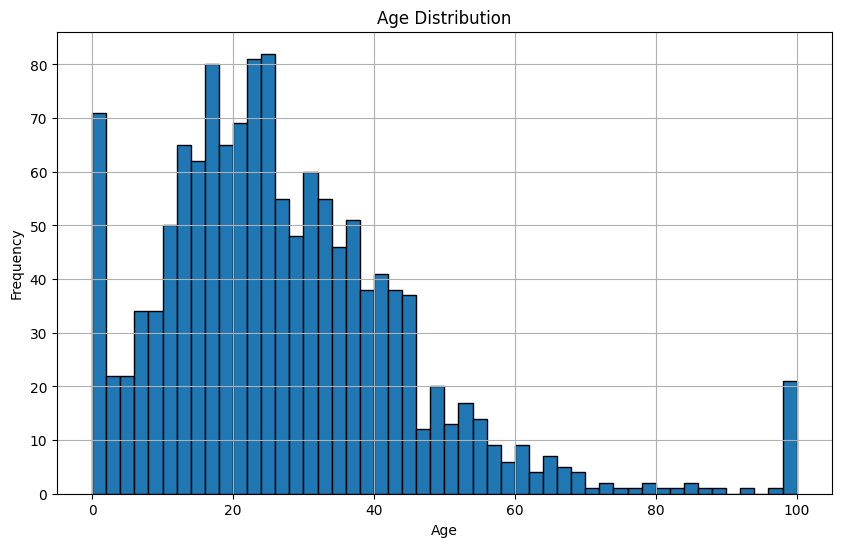

In [589]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=50, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [590]:
d = df['culture'].value_counts().reset_index()

d.columns = ['Value', 'Number of observations']

print(d)

                      Value  Number of observations
0                  Northmen                      90
1                  Ironborn                      78
2                 Free Folk                      35
3                  Valyrian                      32
4                  Braavosi                      25
5                  Ghiscari                      18
6                   Dornish                      16
7                     Reach                      15
8                   Valemen                      12
9                  Rivermen                      12
10                 Dothraki                      10
11               Dornishmen                      10
12                 Westeros                       9
13                Free folk                       8
14                Westerman                       8
15                 northmen                       7
16               Stormlands                       6
17      Vale mountain clans                       5
18          

Grouping cultures and then coding them using one-hot encoding method.

In [591]:
unification_dict = {
    'Northmen': ['Northmen', 'northmen', 'Northern mountain clans'],
    'Ironborn': ['Ironborn', 'Ironmen', 'ironborn'],
    'Free Folk': ['Free Folk', 'Free folk', 'free folk', 'Wildling', 'Wildlings'],
    'Westermen': ['Westerman', 'Westermen', 'westermen', 'Westeros', 'Westerlands'],
    'Dornish': ['Dornish', 'Dornishmen', 'Dorne'],
    'Valemen': ['Valemen', 'Vale', 'Vale mountain clans'],
    'Summer Isles': ['Summer Isles', 'Summer Islands'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Astapori': ['Astapori', 'Astapor'],
    'Meereenese': ['Meereen', 'Meereenese'],
    'Ghiscari': ['Ghiscaricari', 'Ghiscari'],
    'Tyroshi': ['Tyroshi'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Rhoynar': ['Rhoynar'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Stormlander': ['Stormlander', 'Stormlands'],
    'Rivermen': ['Rivermen', 'Riverlands']
}

# Reverse the dictionary to map individual terms to unified terms
unification_map = {term: unified for unified, terms in unification_dict.items() for term in terms}

# Function to unify group names
def unify_group_names(group):
    return unification_map.get(group, group)

# Apply the function to the DataFrame
df['culture'] = df['culture'].apply(unify_group_names)

# Group by the unified group names and sum the counts
df_unified = df['culture'].value_counts().reset_index()

print(df_unified)

           index  culture
0       Northmen      101
1       Ironborn       84
2      Free Folk       48
3       Valyrian       32
4        Dornish       27
5       Braavosi       25
6      Westermen       23
7       Ghiscari       19
8        Valemen       18
9          Reach       15
10      Rivermen       14
11      Dothraki       10
12   Stormlander        7
13  Summer Isles        6
14        Lysene        6
15      Qartheen        5
16    Meereenese        3
17    Crannogmen        3
18       Tyroshi        3
19     First Men        3
20      Astapori        3
21     Lhazareen        2
22     Sistermen        2
23      Norvoshi        2
24      Pentoshi        1
25     The Reach        1
26         Andal        1
27        Asshai        1
28       Rhoynar        1


Filling missing values for culture and title. Adding column hasTitle.

In [592]:
df['culture'] = df['culture'].fillna('unknown')

In [593]:
df['hasTitle'] = df['title'].apply(lambda x: 0 if x == 'no title' else 1)

In [594]:
df = pd.get_dummies(df, columns=['culture'], prefix='culture')

In [595]:
d = df['title'].value_counts().reset_index()

print(d)

                               index  title
0                           no title    703
1                                Ser    272
2                               Lord     61
3                             Prince     32
4                            Maester     30
5                               Lady     16
6                         Winterfell     15
7                        Archmaester     14
8                             Septon     10
9                             Master      9
10                     Grand Maester      8
11                         Cupbearer      7
12                            Knight      4
13                             Septa      4
14                             Eyrie      4
15                     Casterly Rock      4
16                 King in the North      4
17                  Hand of the King      4
18                          Coldmoat      3
19                              Khal      3
20              King-Beyond-the-Wall      3
21                      Bitterbr

Grouping titles in order to decrease number of titles so it would be easier to encode them.

In [596]:
hierarchy = {
    'no title': 'Other',
    'Ser': 'Knight',
    'Lord': 'Noble',
    'Prince': 'Royalty',
    'Maester': 'Scholar',
    'Lady': 'Noble',
    'Winterfell': 'Location',
    'Archmaester': 'Scholar',
    'Septon': 'Religious',
    'Master': 'Official',
    'Grand Maester': 'Scholar',
    'Cupbearer': 'Servant',
    'Knight': 'Knight',
    'Septa': 'Religious',
    'Eyrie': 'Location',
    'Casterly Rock': 'Location',
    'King in the North': 'Royalty',
    'Hand of the King': 'Official',
    'Coldmoat': 'Location',
    'Khal': 'Tribal Leader',
    'King-Beyond-the-Wall': 'Royalty',
    'Bitterbridge': 'Location',
    'Bloodrider': 'Warrior',
    'Last Hearth': 'Location',
    'Wisdom': 'Official',
    'Brightwater': 'Location',
    'Hightower': 'Location',
    'Captain of the guard': 'Official',
    'Sunspear': 'Location',
    'Acorn Hall': 'Location',
    'Blackcrown': 'Location',
    'Harrenhal': 'Location',
    'Queen': 'Royalty',
    'Khalakka': 'Tribal Leader',
    'Stonehelm': 'Location',
    'Castellan': 'Official',
    'Starpike': 'Location',
    'Goodwife': 'Other',
    'Cerwyn': 'Location',
    'King': 'Royalty',
    'Ashford': 'Location',
    'Barrowton': 'Location',
    'First Ranger': 'Warrior',
    'Karhold': 'Location',
    'Hornwood': 'Location',
    'Golden Tooth': 'Location',
    'QueenBlack Bride': 'Royalty',
    'Blacktyde': 'Location',
    'Old Wyk': 'Location',
    'Deepwood Motte': 'Location',
    'Seagard': 'Location',
    'Dreadfort': 'Location',
    'Commander of the City Watch': 'Official',
    'Greenstone': 'Location',
    'Crakehall': 'Location',
    'Blue Grace': 'Religious',
    'Redfort': 'Location',
    'Golden Storm': 'Other',
    'Seneschal': 'Official',
    'Duskendale': 'Location',
    'Sweetport Sound': 'Location',
    'Storm\'s End': 'Location',
    'Longsister': 'Location',
    'Green Grace': 'Religious',
    'First Builder': 'Other',
    'Rills': 'Location',
    'Twins': 'Location',
    'QueenDowager Queen': 'Royalty',
    'Strongsong': 'Location',
    'Runestone': 'Location',
    'Magnar of Thenn': 'Tribal Leader',
    'King of Winter': 'Royalty',
    'Castle Lychester': 'Location',
    'Serthe Knight of Saltpans': 'Knight',
    'Raventree Hall': 'Location',
    'Grassy Vale': 'Location',
    'Godswife': 'Religious',
    'Widow\'s Watch': 'Location',
    'Hayford': 'Location',
    'Castellan of Harrenhal': 'Official',
    'Fair Isle': 'Location',
    'Mistress of whisperers': 'Official',
    'Wyndhall': 'Location',
    'Shatterstone': 'Location',
    'Three Towers': 'Location',
    'Sweetsister': 'Location',
    'Harlaw': 'Location',
    'Old Oak': 'Location',
    'Andals': 'Other',
    'Stone Hedge': 'Location',
    'Riverrun': 'Location',
    'Stokeworth': 'Location',
    'Sandstone': 'Location',
    'Wind Witch': 'Location',
    'Ten Towers': 'Location',
    'Three Sisters': 'Location',
    'Ruddy Hall': 'Location',
    'Goodman': 'Other',
    'BrotherProctor': 'Other',
    'green lands': 'Other',
    'Slave of R\'hllor': 'Other',
    'Red Flower Vale': 'Location',
    'Chief Undergaoler': 'Other',
    'Light of the West': 'Other',
    'Black Wind': 'Other',
    'Lonely Light': 'Location',
    'Highgarden': 'Location',
    'Coldwater Burn': 'Location',
    'SerCastellan of Casterly Rock': 'Knight',
    'Kayce': 'Location',
    'Eastwatch-by-the-Sea': 'Location',
    'High Steward of Highgarden': 'Official',
    'Keeper of the Gates of the Moon': 'Official',
    'Feastfires': 'Location',
    'Haystack Hall': 'Location',
    'Arbor': 'Location',
    'Rook\'s Rest': 'Location',
    'Nightsong': 'Location',
    'Commander of the Second Sons': 'Official',
    'Steward': 'Official',
    'Knight of Griffin\'s Roost': 'Knight',
    'Oakenshield': 'Location',
    'CastellanCommander': 'Official',
    'Captain': 'Official',
    'Horn Hill': 'Location',
    'Volmark': 'Location',
    'Blackmont': 'Location',
    'Magister': 'Other',
    'Maidenpool': 'Location',
    'King of Astapor': 'Royalty',
    'Dyre Den': 'Location',
    'Undergaoler': 'Other',
    'Pinkmaiden': 'Location',
    'Broad Arch': 'Location',
    'Greenshield': 'Location',
    'Ghost Hill': 'Location',
    'Seven Kingdoms': 'Other',
    'Warlock': 'Other',
    'Big BucketThe Wull': 'Other',
    'Iron Islands': 'Location',
    'Dragonstone': 'Location',
    'Protector of the Realm': 'Official',
    'Wraith': 'Other',
    'Tradesman-Captain': 'Other'
}

df['hierarchy'] = df['title'].map(hierarchy)

In [597]:
d = df['hierarchy'].value_counts().reset_index()

print(d)

            index  hierarchy
0           Other        722
1          Knight        279
2        Location        119
3           Noble         77
4         Scholar         52
5         Royalty         47
6        Official         31
7       Religious         17
8         Servant          7
9   Tribal Leader          6
10        Warrior          5


In [598]:
one_hot = pd.get_dummies(df['hierarchy'])

df = pd.concat([df, one_hot], axis=1)

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1362 non-null   object 
 1   title                 1362 non-null   object 
 2   male                  1362 non-null   int64  
 3   dateOfBirth           1362 non-null   float64
 4   dateOfDeath           1362 non-null   float64
 5   house                 1063 non-null   object 
 6   book1                 1362 non-null   int64  
 7   book2                 1362 non-null   int64  
 8   book3                 1362 non-null   int64  
 9   book4                 1362 non-null   int64  
 10  book5                 1362 non-null   int64  
 11  isMarried             1362 non-null   int64  
 12  isNoble               1362 non-null   int64  
 13  age                   1362 non-null   float64
 14  numDeadRelations      1362 non-null   int64  
 15  boolDeadRelations    

Filling missing values for house and encoding 

In [600]:
df['house'] = df['house'].fillna('unknown')
df['hasHouse'] = df['house'].apply(lambda x: 0 if x == 'unknown' else 1)

d = df['house'].value_counts().reset_index()
print(d)

                                    index  house
0                                 unknown    299
1                           Night's Watch     74
2                              House Frey     69
3                             House Stark     54
4                         House Targaryen     44
5                         House Lannister     40
6                           House Greyjoy     30
7                            House Tyrell     25
8                           House Martell     21
9                             House Arryn     15
10                           House Osgrey     14
11                           House Bolton     11
12                          House Bracken     11
13                        House Baratheon     11
14                        House Crakehall     10
15                           House Botley     10
16                        House Hightower     10
17                     Faith of the Seven      9
18                          House Florent      9
19                  

Encoding houses by assigning the number of representants of the house. 

In [601]:
house_counts = df['house'].value_counts()

df['house_encoded'] = df['house'].map(house_counts)

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1362 non-null   object 
 1   title                 1362 non-null   object 
 2   male                  1362 non-null   int64  
 3   dateOfBirth           1362 non-null   float64
 4   dateOfDeath           1362 non-null   float64
 5   house                 1362 non-null   object 
 6   book1                 1362 non-null   int64  
 7   book2                 1362 non-null   int64  
 8   book3                 1362 non-null   int64  
 9   book4                 1362 non-null   int64  
 10  book5                 1362 non-null   int64  
 11  isMarried             1362 non-null   int64  
 12  isNoble               1362 non-null   int64  
 13  age                   1362 non-null   float64
 14  numDeadRelations      1362 non-null   int64  
 15  boolDeadRelations    

In [603]:
df[df['dateOfDeath'].isnull()].shape[0]

0

In [604]:
df = df.drop(columns = ['name', 'title', 'house', 'category', 'hierarchy'])
df.to_csv('../Data/Modeling/character-predictions-modeling-encoded.csv', index=False)

## First models

In [605]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [606]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling-encoded.csv')

In [607]:
df.head()

,male,dateOfBirth,dateOfDeath,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,hasTitle,culture_Andal,culture_Asshai,culture_Astapori,culture_Braavosi,culture_Crannogmen,culture_Dornish,culture_Dothraki,culture_First Men,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Lhazareen,culture_Lysene,culture_Meereenese,culture_Northmen,culture_Norvoshi,culture_Pentoshi,culture_Qartheen,culture_Reach,culture_Rhoynar,culture_Rivermen,culture_Sistermen,culture_Stormlander,culture_Summer Isles,culture_The Reach,culture_Tyroshi,culture_Valemen,culture_Valyrian,culture_Westermen,culture_unknown,Knight,Location,Noble,Official,Other,Religious,Royalty,Scholar,Servant,Tribal Leader,Warrior,hasHouse,house_encoded
0,0,265.0,500.0,0,0,0,0,1,0,0,35.0,0,0,0,0.006689,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,299
1,1,279.0,297.0,0,1,0,1,1,0,0,18.0,0,0,0,0.090301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,11
2,1,275.0,289.0,1,1,1,1,1,0,0,14.0,4,1,0,0.140468,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,30
3,0,293.0,500.0,0,1,1,1,0,0,0,12.0,0,0,0,0.117057,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,4
4,1,275.0,500.0,0,0,0,1,0,0,1,25.0,0,0,0,0.060201,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,3


In [608]:
df = pd.get_dummies(df, drop_first=True)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
df_stan = scaler1.fit_transform(df)
df_norm = scaler2.fit_transform(df)

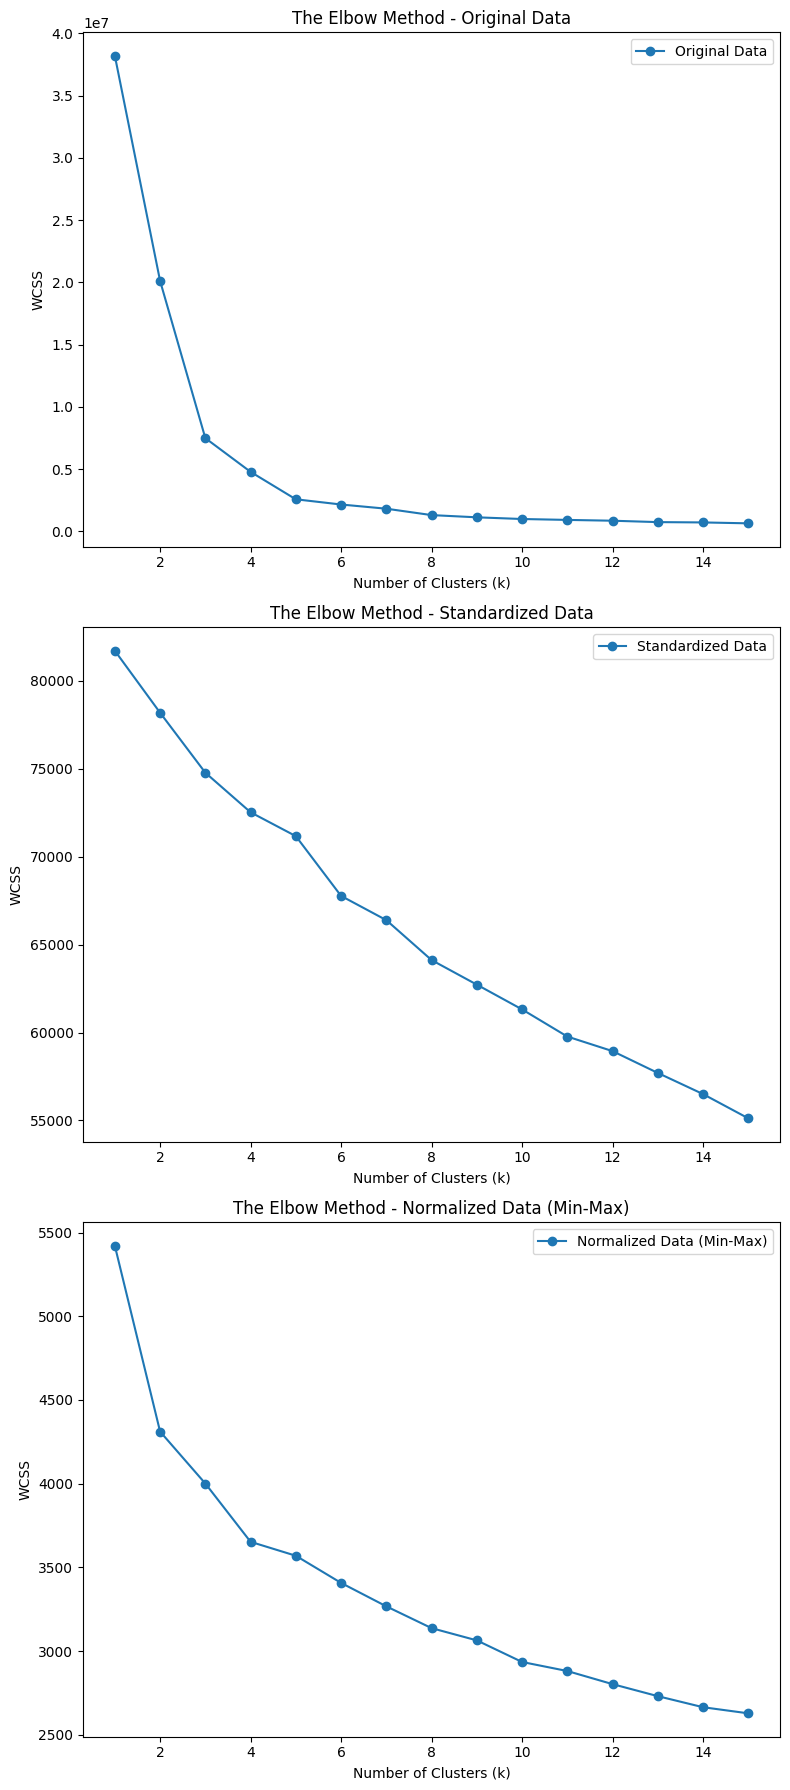

In [609]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

# Obliczenie wyników dla każdego rodzaju danych
wcss_vec_df = count_wcss_scores(df, 15)
wcss_vec_df_stan = count_wcss_scores(df_stan, 15)
wcss_vec_df_norm = count_wcss_scores(df_norm, 15)

x_ticks = list(range(1, len(wcss_vec_df) + 1))

# Tworzenie trzech osobnych wykresów
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

# Wykres dla oryginalnych danych
axs[0].plot(x_ticks, wcss_vec_df, marker='o', label='Original Data')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('WCSS')
axs[0].set_title('The Elbow Method - Original Data')
axs[0].legend()

# Wykres dla standaryzowanych danych
axs[1].plot(x_ticks, wcss_vec_df_stan, marker='o', label='Standardized Data')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('WCSS')
axs[1].set_title('The Elbow Method - Standardized Data')
axs[1].legend()

# Wykres dla znormalizowanych danych
axs[2].plot(x_ticks, wcss_vec_df_norm, marker='o', label='Normalized Data (Min-Max)')
axs[2].set_xlabel('Number of Clusters (k)')
axs[2].set_ylabel('WCSS')
axs[2].set_title('The Elbow Method - Normalized Data (Min-Max)')
axs[2].legend()

plt.tight_layout()
plt.show()


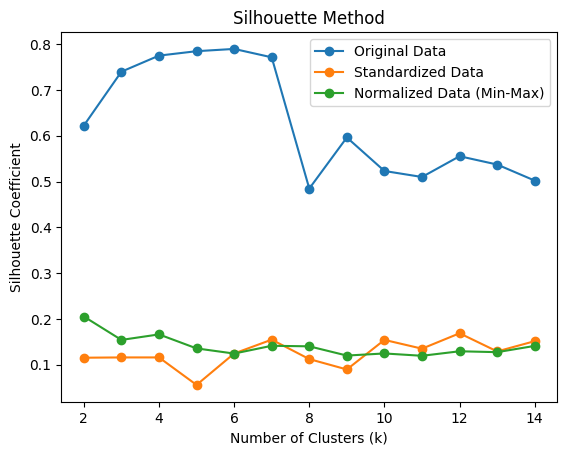

In [610]:
def calculate_silhouette_score(data):
    silhouette_scores = []
    for n in range(2, 15):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return silhouette_scores

silhouette_df = calculate_silhouette_score(df)
silhouette_df_stan = calculate_silhouette_score(df_stan)
silhouette_df_norm = calculate_silhouette_score(df_norm)

x_ticks = list(range(2, 15))
plt.plot(x_ticks, silhouette_df, marker='o', label='Original Data')
plt.plot(x_ticks, silhouette_df_stan, marker='o', label='Standardized Data')
plt.plot(x_ticks, silhouette_df_norm, marker='o', label='Normalized Data (Min-Max)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method')
plt.legend()
plt.show()

In [611]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

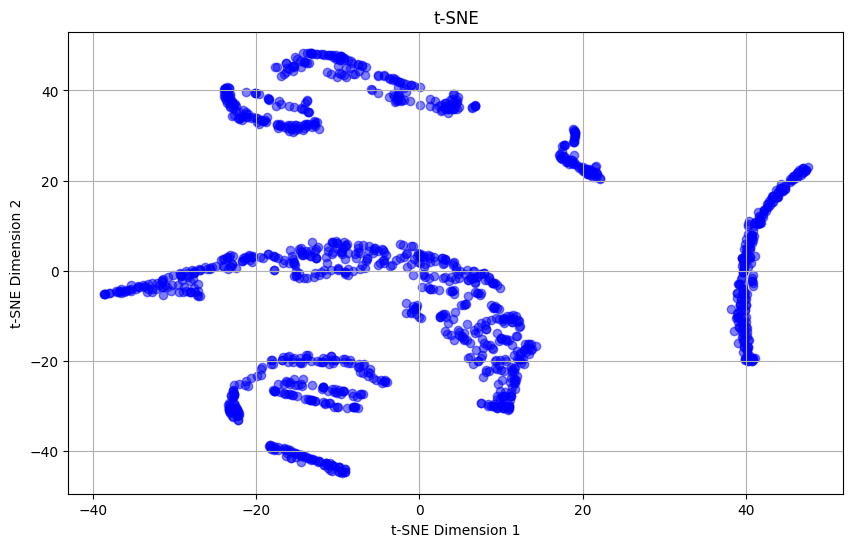

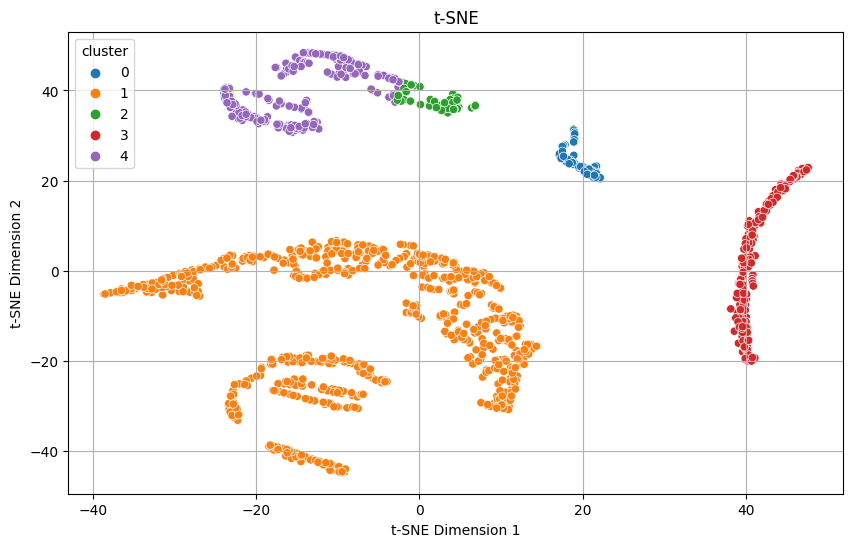

In [612]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

In [613]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Przykładowa ramka danych
# df = pd.DataFrame({...})

# Przeprowadzenie t-SNE
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

# Przeprowadzenie kMeans
kmeans = KMeans(n_clusters=5, random_state=123)
df['cluster'] = kmeans.fit_predict(df)

# Wykres t-SNE z interaktywnymi etykietami punktów
fig1 = px.scatter(x=tsne_results[:, 0], y=tsne_results[:, 1], text=df.index, 
                  title='t-SNE', labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'})

# Dodanie interaktywnych etykiet punktów (wyświetlających indeksy wierszy)
fig1.update_traces(hoverinfo='text')

# Wykres t-SNE z klastrowaniem i interaktywnymi etykietami punktów
fig2 = px.scatter(x=tsne_results[:, 0], y=tsne_results[:, 1], color=df['cluster'], 
                  title='t-SNE with KMeans Clusters', labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'})

# Dodanie interaktywnych etykiet punktów (wyświetlających indeksy wierszy)
fig2.update_traces(hoverinfo='text')

# Zmniejszenie rozmiaru wykresu
fig1.show(width=800, height=500)
fig2.show(width=800, height=500)
